In [1]:
#PROYECTO FINAL
#INTELIGENCIA ARTIFICIAL Y REDES NEURONALES LMV N4
#INTEGRANTES DEL EQUIPO:
# Zalvador Mendoza Vélez 2109163 IMTC
# Alan David Perez Perez 1956828 IMTC
# DIego Eduardo Ortega Estrella 1994855 IMTC
# Axel Moisés Espinoza Londoro 2002721 IMTC
# Andrea Verónica Moreno España 2109443 IMTC

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
from google.colab import files
import zipfile
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
!pip install kaggle
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"zalvadormendoza","key":"2f282d311f72a23ee3bb712114baa9ed"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset --force

Dataset URL: https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset
License(s): copyright-authors
 57% 16.0M/28.0M [00:00<00:00, 71.0MB/s]
100% 28.0M/28.0M [00:00<00:00, 80.5MB/s]


In [ ]:
# Ruta al archivo ZIP descargado
zip_file_path = '/content/alzheimer-mri-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/Dataset'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Ordena las subcarpetas alfabéticamente
subcarpetas_ordenadas = sorted(subcarpetas)

# Listas para almacenar imágenes y etiquetas
imagenes= []
etiquetas = []

z=0
# Itera sobre las subcarpetas encontradas
for z, subcarpeta in enumerate(subcarpetas_ordenadas):
    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f"{subcarpeta}/*.[jJ][pP][gG]"):
            print(x)
            imagen = cv2.imread(x)
            # Formato de imagen
            img_resized = cv2.resize(imagen, (128, 128))

            # Guardar imágenes y etiquetas
            arreglo_imagen = np.array(img_resized)
            imagenes.append(arreglo_imagen)
            etiquetas.append(z)

print("Procesamiento de imágenes completado. ¡Listo para entrenar tu modelo!")

Procesamiento de imágenes completado. ¡Listo para entrenar tu modelo!


In [ ]:
etiquetas = np.array(etiquetas)

In [ ]:
images = np.array(imagenes)

In [ ]:
np.shape(images)

(6400, 128, 128, 3)

In [ ]:
len(etiquetas)

6400

In [ ]:
etiquetas[-1]

3

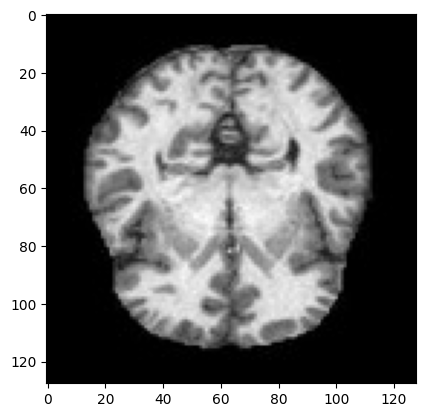

In [ ]:
plt.imshow(images[1100])

In [ ]:
class_names = ['Mild_Demented','Moderate_Demented','Non_Demented','Very_Mild_Demented']

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, etiquetas, test_size=0.2, random_state=32)

In [ ]:
train_images= train_images / 255.0

In [ ]:
test_images= test_images / 255.0

In [ ]:
len(train_images)

5120

In [ ]:
len(test_images)

1280

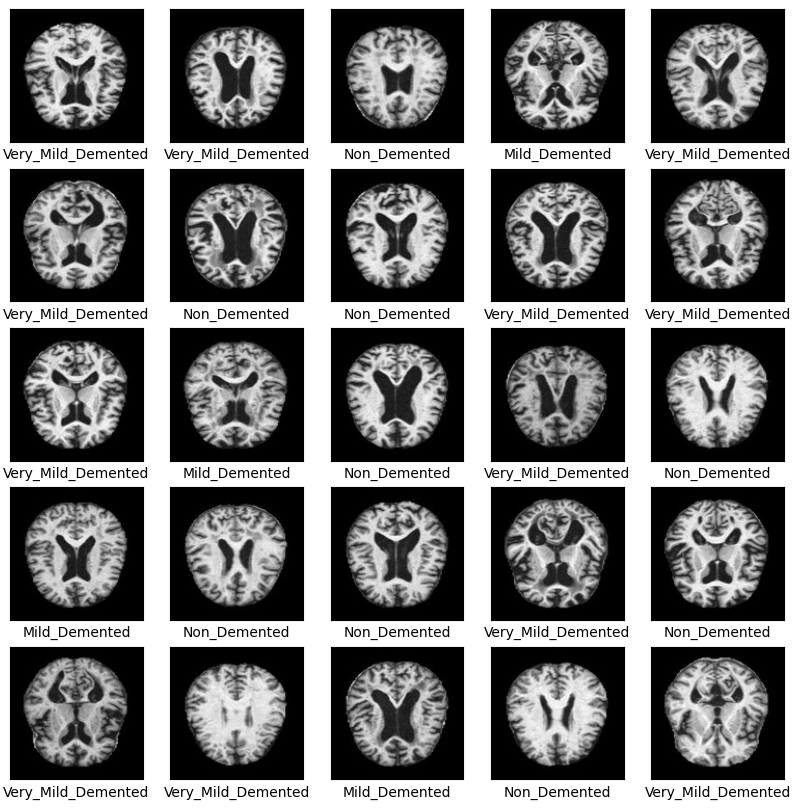

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
160/160 [==============================] - 126s 781ms/step - loss: 0.9899 - accuracy: 0.5254 - val_loss: 0.8547 - val_accuracy: 0.6000
Epoch 2/10
160/160 [==============================] - 113s 707ms/step - loss: 0.7815 - accuracy: 0.6424 - val_loss: 0.7555 - val_accuracy: 0.6477
Epoch 3/10
160/160 [==============================] - 104s 651ms/step - loss: 0.5589 - accuracy: 0.7623 - val_loss: 0.5242 - val_accuracy: 0.7711
Epoch 4/10
160/160 [==============================] - 110s 688ms/step - loss: 0.3203 - accuracy: 0.8709 - val_loss: 0.3043 - val_accuracy: 0.8789
Epoch 5/10
160/160 [==============================] - 111s 692ms/step - loss: 0.1564 - accuracy: 0.9457 - val_loss: 0.2446 - val_accuracy: 0.9094
Epoch 6/10
160/160 [==============================] - 116s 728ms/step - loss: 0.0936 - accuracy: 0.9717 - val_loss: 0.1495 - val_accuracy: 0.9500
Epoch 7/10
160/160 [==============================] - 111s 694ms/step - loss: 0.0537 - accuracy: 0.9822 - val_loss: 0.1325 -

40/40 - 6s - loss: 0.0690 - accuracy: 0.9750 - 6s/epoch - 154ms/step


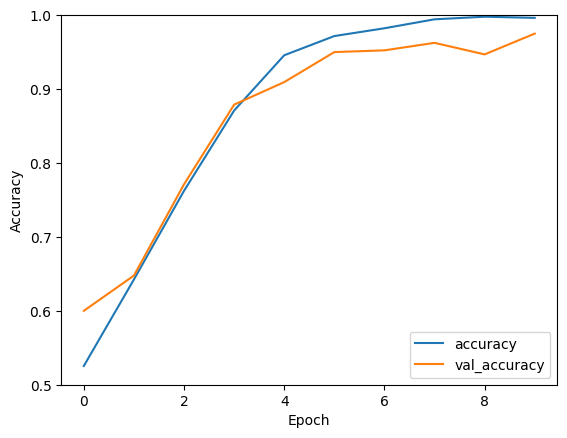

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9750000238418579


In [ ]:
predictions = model.predict(test_images)

40/40 [==============================] - 7s 164ms/step


In [ ]:
np.argmax(predictions[0])

3

In [ ]:
test_labels[0]

3

In [ ]:
np.argmax(predictions[10])

2

In [ ]:
test_labels[10]

2

In [ ]:
np.argmax(predictions[77])

0

In [ ]:
test_labels[77]

0

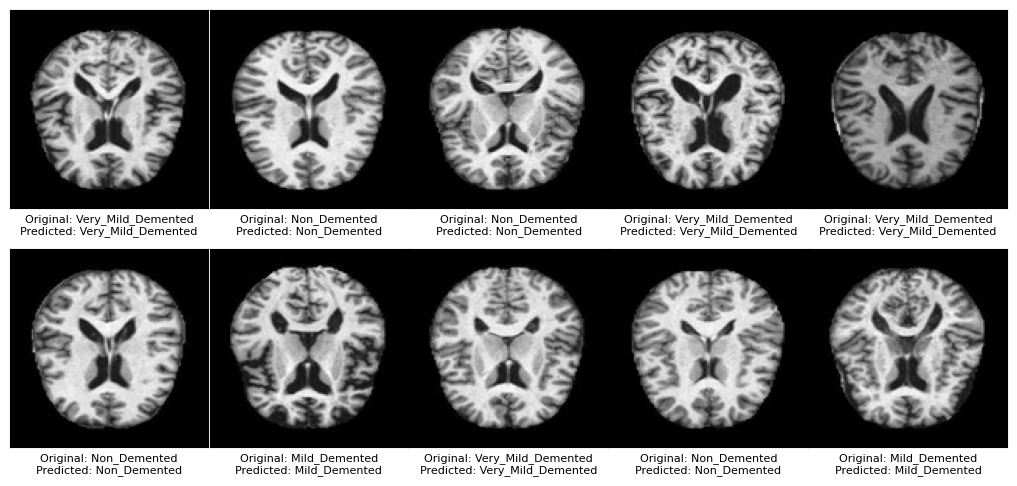

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap="gray")
    plt.xlabel(f"Original: {class_names[test_labels[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}", fontsize=8)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
